## IMPORTS ET PREPARATION DES DONNÉES

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spacy
import nltk

In [2]:
data = pd.read_csv("../ETL/output_file.csv")
question = data.columns[1]
data["formated"] = data[question] 
formation = "toutes"

[OPTIONEL] Sélectionner une formation

In [3]:
# select only with raw with a formation = Informatique et Gestion (IG)

formation = "MEA"
data = data[data["formation"].str.contains(formation)]


[OPTIONEL] Enlever les stops words

In [3]:
# remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('french')
data['formated'] = data[data.columns[1]].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
# remove row with empty text
data = data[data.formated != '']


[nltk_data] Downloading package stopwords to /home/remi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Overview data

In [5]:
print("taille du dataset : ", data.shape[0])
display(data.head())

taille du dataset :  2665


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated
0,Mecanique et Interactions (MI),Tres complexe de repondre cela depend essentie...,Tres complexe de repondre cela depend essentie...
1,Mecanique et Interactions (MI),MMC & MSG MEF vibration RDM gestion de projet ...,MMC & MSG MEF vibration RDM gestion de projet ...
2,Mecanique et Interactions (MI),La MEF et la mecanique des fluides,La MEF et la mecanique des fluides
3,Mecanique et Interactions (MI),Mecanique des milieux continus.,Mecanique des milieux continus.
4,Sciences et Technologies de l'Eau (STE),l'Hydrologie l'Hydraulique ainsi que la mecani...,l'Hydrologie l'Hydraulique ainsi que la mecani...


In [6]:
print(data["formation"].unique())

['Mecanique et Interactions (MI)'
 "Sciences et Technologies de l'Eau (STE)" 'Materiaux (MAT)'
 'Informatique et Gestion (IG)'
 'Genie Biologique et Agroalimentaires (GBA)'
 'Systemes Embarques (SE - apprentissage)'
 'Microelectronique Et Automatique (MEA)'
 'Eau et Genie Civil (EGC - apprentissage)'
 'Mecanique Structures Industrielles (MSI - apprentissage)'
 'Energetique - energies Renouvelables (EnR)']


## Create embedding

Création de l'embedding, pour cette étape l'objectif est de convertir nos données du texte en vecteur

Si necessaire installer la bibliothèque contenant le réseau de neuronne de conversion. Ici c'est la version française de spacy et la version small (sm) pour des vecteurs avec 96 dimensions.

In [ ]:
python -m spacy download fr_core_news_sm

In [5]:
python -m spacy download fr_core_news_lg

SyntaxError: invalid syntax (555220813.py, line 1)

In [4]:
nlp = spacy.load("fr_core_news_lg")

On ajoute une colonne dans le dataframe contenant les vecteurs associés à chaque phrase.

In [5]:
# add a column vector in data with each sentence convert into a vector with spacy

data["vector"] = data["formated"].apply(lambda x: nlp(x).vector)

display(data.head())

,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector
21,Microelectronique Et Automatique (MEA),Stage de 5e annee,Stage de 5e annee,"[-1.0062425, 0.409955, 0.83372325, 4.138075, -..."
22,Microelectronique Et Automatique (MEA),Cours de langues Commande en 3D perception,Cours de langues Commande en 3D perception,"[0.80494136, 0.76808643, -0.3059186, 1.4557215..."
27,Microelectronique Et Automatique (MEA),Les cours de reseau / programmation,Les cours de reseau / programmation,"[-1.2095417, 0.371681, 2.0007982, 1.7169882, -..."
61,Microelectronique Et Automatique (MEA),Technologie,Technologie,"[-1.2278, 1.0996, -0.33517, 1.8946, -2.1544, -..."
78,Microelectronique Et Automatique (MEA),developpement logiciel (C C++ JAVA KOTLIN...),developpement logiciel (C C++ JAVA KOTLIN...),"[-0.9432689, 1.3358512, 1.2884778, 0.85865104,..."


Présentation des résulats de l'embedding.

[array([-1.00624251e+00,  4.09954995e-01,  8.33723247e-01,  4.13807487e+00,
       -3.00094986e+00,  8.81125182e-02, -2.03385496e+00, -9.22035038e-01,
        1.97317505e+00,  1.27568507e+00, -1.49454999e+00, -4.06462431e-01,
       -4.40945029e-01,  4.50792581e-01,  2.45187497e+00, -2.19980264e+00,
        3.00915003e+00,  2.03937247e-01,  1.89083517e+00, -5.28205037e-01,
        9.64982629e-01, -8.47022474e-01, -1.88838255e+00,  6.21587634e-02,
        2.40432501e-01,  5.21522522e+00, -7.62727499e-01,  1.23838758e+00,
        3.80103499e-01,  8.82137537e-01, -9.49536026e-01, -2.68475509e+00,
        2.65959144e+00, -5.78877449e-01, -9.27751184e-01, -3.21587503e-01,
        9.86219943e-01, -1.55325007e+00, -1.26539493e+00,  2.83940244e+00,
        7.33327568e-01, -8.78900051e-01,  1.18644500e+00,  1.08014934e-01,
       -1.30325520e+00,  1.96558022e+00, -1.65105510e+00,  1.53554976e-01,
       -1.59619972e-01, -4.48094994e-01,  4.32587504e-01,  2.06080985e+00,
       -8.36174935e-02, 

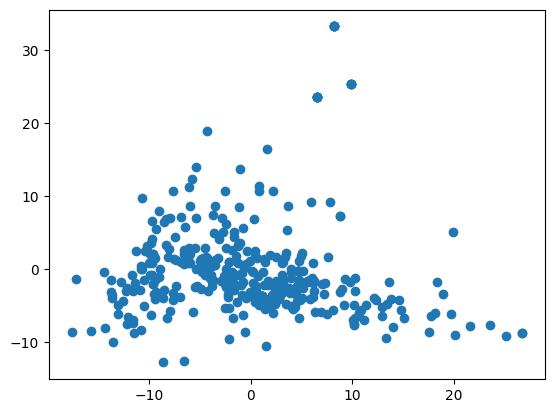

In [6]:
# plot embedding with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(data["vector"].tolist())
print(min([len(x) for x in data["vector"].tolist()]))
result_pca = pca.fit_transform(data["vector"].tolist())
x = result_pca[:, 0]
y = result_pca[:, 1]

plt.scatter(x, y)
plt.show()


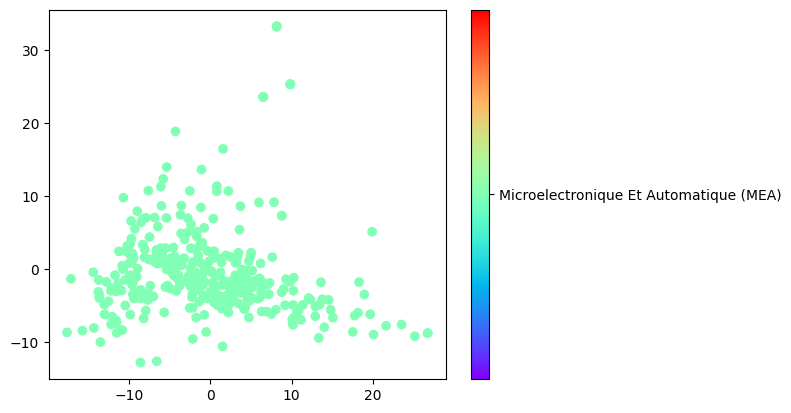

In [7]:
# plot embedding with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
result_pca = pca.fit_transform(data["vector"].tolist())
x = result_pca[:, 0]
y = result_pca[:, 1]

label_encoder = LabelEncoder()
colors_numerical = label_encoder.fit_transform(data["formation"])

plt.scatter(x, y, c=colors_numerical, cmap="rainbow")

cbar = plt.colorbar(ticks=range(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)

plt.show()

## KMEANS

### Quels paramètres ?

In [10]:
from sklearn.metrics import silhouette_score
from kmeans import calculate_kmeans

NUMBER_OF_CLUSTERS = 9
SEED = 0
embeddings = data["vector"].tolist()

kmeans, clusters = calculate_kmeans(embeddings, NUMBER_OF_CLUSTERS, SEED)

print(silhouette_score(data["vector"].tolist(), clusters))

/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.15916966


/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Document

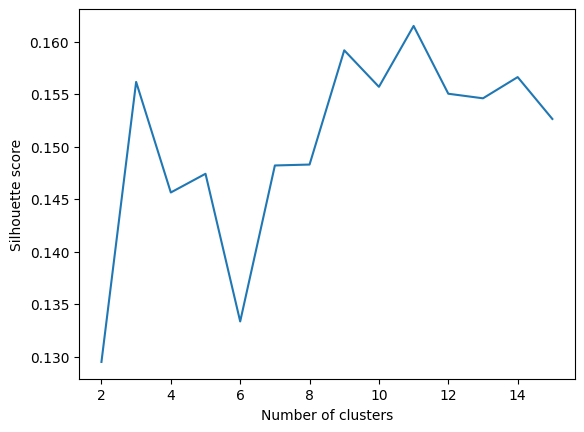

In [9]:
# plot the silhouette score for different number of clusters
from kmeans import calculate_silhouette_scores

MIN_NUMBER_OF_CLUSTERS = 2
MAX_NUMBER_OF_CLUSTERS = 15
embeddings = data["vector"].tolist()
SEED = 0

silhouette_scores = calculate_silhouette_scores(embeddings, MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS, SEED)

plt.plot(range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS+1), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Document

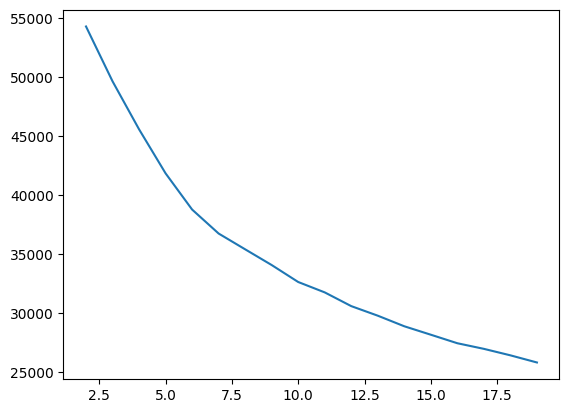

In [13]:
# elbow method
from sklearn.cluster import KMeans

MIN_NUMBER_OF_CLUSTERS = 2
MAX_NUMBER_OF_CLUSTERS = 20

embeddings = data["vector"].tolist()
inertia = []
for number_of_clusters in range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=1).fit(embeddings)
    inertia.append(kmeans.inertia_)
plt.plot(range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS), inertia)


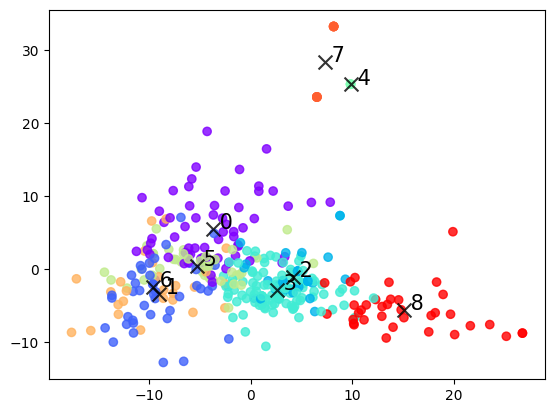

In [11]:
# plot kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

result_pca2d = pca.fit_transform(data["vector"].tolist())
center_pca2d = pca.transform(kmeans.cluster_centers_)

x = result_pca2d[:, 0]
y = result_pca2d[:, 1]

plt.scatter(x, y, alpha=0.8, c=clusters, cmap="rainbow")
plt.scatter(center_pca2d[:, 0], center_pca2d[:, 1], c="black", s=100, alpha=0.8, marker="x")
for i, center in enumerate(center_pca2d):
    plt.annotate(" "+str(i), center, fontsize=15)

plt.show()



/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


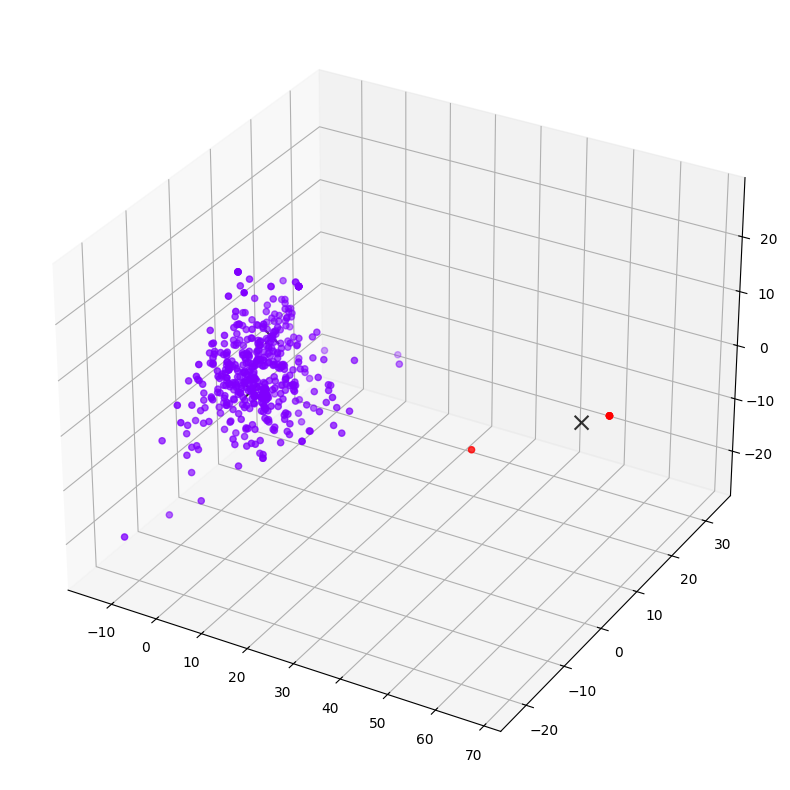

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data["vector"].tolist())

# plot kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

result_pca = pca.fit_transform(data["vector"].tolist())
center_pca = pca.transform(kmeans.cluster_centers_)

x = result_pca[:, 0]
y = result_pca[:, 1]
z = result_pca[:, 2]

# plot 3D
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z, c=clusters, cmap="rainbow")
ax.scatter3D(center_pca[:, 0], center_pca[:, 1], center_pca[:, 2], c="black", s=100, alpha=0.8, marker="x")
plt.show()

In [12]:
# add a column cluster in data
data["cluster"] = clusters
display(data.head(10))

,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
21,Microelectronique Et Automatique (MEA),Stage de 5e annee,Stage de 5e annee,"[-1.0062425, 0.409955, 0.83372325, 4.138075, -...",5
22,Microelectronique Et Automatique (MEA),Cours de langues Commande en 3D perception,Cours de langues Commande en 3D perception,"[0.80494136, 0.76808643, -0.3059186, 1.4557215...",5
27,Microelectronique Et Automatique (MEA),Les cours de reseau / programmation,Les cours de reseau / programmation,"[-1.2095417, 0.371681, 2.0007982, 1.7169882, -...",0
61,Microelectronique Et Automatique (MEA),Technologie,Technologie,"[-1.2278, 1.0996, -0.33517, 1.8946, -2.1544, -...",2
78,Microelectronique Et Automatique (MEA),developpement logiciel (C C++ JAVA KOTLIN...),developpement logiciel (C C++ JAVA KOTLIN...),"[-0.9432689, 1.3358512, 1.2884778, 0.85865104,...",8
82,Microelectronique Et Automatique (MEA),Technique et relationnel,Technique et relationnel,"[-0.07203666, -1.5020933, -0.6436567, 3.089599...",0
83,Microelectronique Et Automatique (MEA),Enseignements scientifiques generalistes,Enseignements scientifiques generalistes,"[-0.95587665, -1.1120733, -0.55071, 1.8858334,...",0
89,Microelectronique Et Automatique (MEA),La pratiques du developpement informatique au ...,La pratiques du developpement informatique au ...,"[-1.0713577, 0.48743233, 0.1252589, 3.0444968,...",5
94,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
102,Microelectronique Et Automatique (MEA),Pour le CDI que j'ai pu avoir : uC logique tra...,Pour le CDI que j'ai pu avoir : uC logique tra...,"[0.5842449, -0.8795085, -1.570668, 0.80359524,...",1


In [13]:
# dislay each cluster
for cluster in np.unique(clusters):
    print(f"cluster {cluster}, size {len(data[data['cluster'] == cluster])}")
    display(data[data["cluster"] == cluster].head(10))
    print("\n\n")

cluster 0, size 62


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
27,Microelectronique Et Automatique (MEA),Les cours de reseau / programmation,Les cours de reseau / programmation,"[-1.2095417, 0.371681, 2.0007982, 1.7169882, -...",0
82,Microelectronique Et Automatique (MEA),Technique et relationnel,Technique et relationnel,"[-0.07203666, -1.5020933, -0.6436567, 3.089599...",0
83,Microelectronique Et Automatique (MEA),Enseignements scientifiques generalistes,Enseignements scientifiques generalistes,"[-0.95587665, -1.1120733, -0.55071, 1.8858334,...",0
104,Microelectronique Et Automatique (MEA),Les projets et l'autonomie laisses aux etudian...,Les projets et l'autonomie laisses aux etudian...,"[-0.8223565, -0.46908283, 0.7648292, 1.9308041...",0
141,Microelectronique Et Automatique (MEA),Microelectronique et projets,Microelectronique et projets,"[-0.61597, -1.5572667, -0.3084, 0.9152767, -2....",0
166,Microelectronique Et Automatique (MEA),Programmation C et C++ Systemes embarques Conn...,Programmation C et C++ Systemes embarques Conn...,"[0.57027286, -1.6263417, -0.56070906, 1.51116,...",0
174,Microelectronique Et Automatique (MEA),Les enseignements en microelectroniques system...,Les enseignements en microelectroniques system...,"[0.46424997, -0.53082615, 0.35851562, 0.648238...",0
177,Microelectronique Et Automatique (MEA),Enseignements scientifiques et techniques,Enseignements scientifiques et techniques,"[-0.8383925, -2.1724775, -0.548755, 2.2783751,...",0
346,Microelectronique Et Automatique (MEA),Les projets et les travaux pratiques.,Les projets et les travaux pratiques.,"[-0.4422443, -1.7288686, 0.60122573, 0.5218, -...",0
357,Microelectronique Et Automatique (MEA),Programmation embarque. Rtos. Logique. Reseau....,Programmation embarque. Rtos. Logique. Reseau....,"[-0.27518833, -0.576472, 0.5587538, 1.6515622,...",0





cluster 1, size 42


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
102,Microelectronique Et Automatique (MEA),Pour le CDI que j'ai pu avoir : uC logique tra...,Pour le CDI que j'ai pu avoir : uC logique tra...,"[0.5842449, -0.8795085, -1.570668, 0.80359524,...",1
127,Microelectronique Et Automatique (MEA),Pas directement pour mon metiers actuel mais d...,Pas directement pour mon metiers actuel mais d...,"[-0.3118563, 0.51640373, -1.1789626, 2.4302227...",1
296,Microelectronique Et Automatique (MEA),Les activites liees a l'informatique et aux re...,Les activites liees a l'informatique et aux re...,"[-1.1776985, 0.6514115, -1.374233, 2.0767446, ...",1
330,Microelectronique Et Automatique (MEA),Ayant completement change de domaine ce que je...,Ayant completement change de domaine ce que je...,"[-0.3641297, -0.16320562, -1.5570014, 1.292337...",1
397,Microelectronique Et Automatique (MEA),Adaptabilite qui n'etait d'ailleurs pas un ens...,Adaptabilite qui n'etait d'ailleurs pas un ens...,"[-0.89906, -1.1387856, -4.17407, 2.1800056, -0...",1
422,Microelectronique Et Automatique (MEA),Bien trouve sa voie des le debut de la formati...,Bien trouve sa voie des le debut de la formati...,"[0.10119269, -0.999694, -3.8036246, 1.8035105,...",1
423,Microelectronique Et Automatique (MEA),Tous. La culture generale est un plus dont on ...,Tous. La culture generale est un plus dont on ...,"[1.1442447, -1.2299618, -3.0279295, 0.42792362...",1
446,Microelectronique Et Automatique (MEA),Programmation VHDL et C touts ce qui en decoul...,Programmation VHDL et C touts ce qui en decoul...,"[-0.032963578, -0.42420334, -1.2334205, 1.3556...",1
506,Microelectronique Et Automatique (MEA),Microelectronique pour la comprehension du pro...,Microelectronique pour la comprehension du pro...,"[0.17162062, 0.17373346, -0.748842, 0.703188, ...",1
568,Microelectronique Et Automatique (MEA),Tout les enseignements techniques me sont util...,Tout les enseignements techniques me sont util...,"[0.47402835, -0.39508566, -2.0505018, 1.235197...",1





cluster 2, size 39


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
61,Microelectronique Et Automatique (MEA),Technologie,Technologie,"[-1.2278, 1.0996, -0.33517, 1.8946, -2.1544, -...",2
110,Microelectronique Et Automatique (MEA),Robotique mobile programmation microcontroleur,Robotique mobile programmation microcontroleur,"[-0.16980502, 0.545035, -2.0453274, 2.16935, -...",2
137,Microelectronique Et Automatique (MEA),Electronique Informatique,Electronique Informatique,"[-0.06586333, 0.61853665, -0.38800335, 2.08506...",2
192,Microelectronique Et Automatique (MEA),Informatique,Informatique,"[0.28007, 1.0313, -0.30431, 2.7034, -2.0684, -...",2
418,Microelectronique Et Automatique (MEA),Programmation,Programmation,"[-1.0454, 1.9584, 0.035266, 3.0778, -2.3096, 0...",2
434,Microelectronique Et Automatique (MEA),Robotique Automatique C++,Robotique Automatique C++,"[-0.26420668, 0.9504034, -0.47428003, 3.028566...",2
524,Microelectronique Et Automatique (MEA),Electronique Programmation microcontroleur,Electronique Programmation microcontroleur,"[-0.38214004, 0.9841067, -1.0181447, 2.6385, -...",2
710,Microelectronique Et Automatique (MEA),Programmation,Programmation,"[-1.0454, 1.9584, 0.035266, 3.0778, -2.3096, 0...",2
717,Microelectronique Et Automatique (MEA),Projets,Projets,"[-2.8007, -1.2464, 0.067842, 0.89257, -2.5342,...",2
732,Microelectronique Et Automatique (MEA),Reseau Programmation,Reseau Programmation,"[-0.70942, 1.19123, 0.356838, 3.0862, -0.32635...",2





cluster 3, size 104


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
111,Microelectronique Et Automatique (MEA),Developpement informatique Management Droit E...,Developpement informatique Management Droit E...,"[0.016716141, -0.19267544, -0.43031538, 2.7241...",3
112,Microelectronique Et Automatique (MEA),Vhdl microcontroleur electronique (tous les co...,Vhdl microcontroleur electronique (tous les co...,"[-0.10738094, 0.7655545, 0.4203264, 0.99580914...",3
129,Microelectronique Et Automatique (MEA),Electronique Circuit integre analogique / num...,Electronique Circuit integre analogique / num...,"[-0.46054167, 0.20652659, -0.35723794, 1.65919...",3
130,Microelectronique Et Automatique (MEA),,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
140,Microelectronique Et Automatique (MEA),Programmation en C et C++ Systemes embarques E...,Programmation en C et C++ Systemes embarques E...,"[-0.027797895, 0.22464111, 0.20416035, 0.74618...",3
145,Microelectronique Et Automatique (MEA),Le developpement embarque,Le developpement embarque,"[0.36306667, 0.54494333, -2.14833, 2.9637067, ...",3
167,Microelectronique Et Automatique (MEA),Systemes embarques Electronique Programmation,Systemes embarques Electronique Programmation,"[-0.24569626, 0.75833, -0.5811785, 2.132155, -...",3
173,Microelectronique Et Automatique (MEA),Anglais Insertion pro,Anglais Insertion pro,"[-0.36549202, 1.0544033, 0.337229, 1.44443, -0...",3
194,Microelectronique Et Automatique (MEA),Systeme embarque VHDL microcontroleur architec...,Systeme embarque VHDL microcontroleur architec...,"[0.22635311, 0.7391283, -0.03883501, 1.15911, ...",3
292,Microelectronique Et Automatique (MEA),Fpga projets semestriels Electronique,Fpga projets semestriels Electronique,"[-0.746165, -0.15390025, -0.1404275, 0.823665,...",3





cluster 4, size 4


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
465,Microelectronique Et Automatique (MEA),Tous,Tous,"[-0.59239, 1.3175, 1.1327, -0.4536, 0.18984, -...",4
1135,Microelectronique Et Automatique (MEA),Tous,Tous,"[-0.59239, 1.3175, 1.1327, -0.4536, 0.18984, -...",4
2369,Microelectronique Et Automatique (MEA),Tous,Tous,"[-0.59239, 1.3175, 1.1327, -0.4536, 0.18984, -...",4
2556,Microelectronique Et Automatique (MEA),Tous,Tous,"[-0.59239, 1.3175, 1.1327, -0.4536, 0.18984, -...",4





cluster 5, size 42


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
21,Microelectronique Et Automatique (MEA),Stage de 5e annee,Stage de 5e annee,"[-1.0062425, 0.409955, 0.83372325, 4.138075, -...",5
22,Microelectronique Et Automatique (MEA),Cours de langues Commande en 3D perception,Cours de langues Commande en 3D perception,"[0.80494136, 0.76808643, -0.3059186, 1.4557215...",5
89,Microelectronique Et Automatique (MEA),La pratiques du developpement informatique au ...,La pratiques du developpement informatique au ...,"[-1.0713577, 0.48743233, 0.1252589, 3.0444968,...",5
136,Microelectronique Et Automatique (MEA),Enseignement de la programmation objet,Enseignement de la programmation objet,"[-0.319004, 0.903422, 0.20691605, 3.97332, -3....",5
161,Microelectronique Et Automatique (MEA),Cours d'electronique Cours d'anglais Cours d'i...,Cours d'electronique Cours d'anglais Cours d'i...,"[-0.11717936, 0.49524003, 0.8937563, 2.0515745...",5
168,Microelectronique Et Automatique (MEA),Conception et programmation de FPGA en VHDL pr...,Conception et programmation de FPGA en VHDL pr...,"[0.10913733, 0.15732686, 0.26835185, 0.7817156...",5
395,Microelectronique Et Automatique (MEA),Cours de langage VHDL,Cours de langage VHDL,"[0.6651017, -0.3489025, 0.920685, 2.582925, -3...",5
436,Microelectronique Et Automatique (MEA),Cours d'electronique basique Cours de microel...,Cours d'electronique basique Cours de microel...,"[-0.28180268, 0.12827526, -0.4855413, 2.472004...",5
486,Microelectronique Et Automatique (MEA),Enseignement dans la specialite robotique.,Enseignement dans la specialite robotique.,"[-1.1320766, 0.21116662, -0.8882849, 2.7165468...",5
700,Microelectronique Et Automatique (MEA),Cours de gestion de projet,Cours de gestion de projet,"[0.18159994, 1.1487539, 1.472614, 3.122132, -5...",5





cluster 6, size 26


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
146,Microelectronique Et Automatique (MEA),Le management Les projets de groupe L'electron...,Le management Les projets de groupe L'electron...,"[-0.93734753, -0.09586373, 0.3502438, 2.41962,...",6
147,Microelectronique Et Automatique (MEA),l'electronique et la programmation,l'electronique et la programmation,"[-2.165612, -1.0117661, -0.295568, 3.051986, -...",6
160,Microelectronique Et Automatique (MEA),L'ensemble mais pousse plus la formation cote ...,L'ensemble mais pousse plus la formation cote ...,"[-0.95402795, 0.6930246, -2.4510806, 1.0815182...",6
187,Microelectronique Et Automatique (MEA),Adaptation capacite d'apprentissage rapide.,Adaptation capacite d'apprentissage rapide.,"[0.28230333, -0.36916602, -1.6439967, 2.008141...",6
491,Microelectronique Et Automatique (MEA),Introduction a l'electronique filtrage concept...,Introduction a l'electronique filtrage concept...,"[-0.9330997, 0.11427445, -0.5930391, 2.3653977...",6
499,Microelectronique Et Automatique (MEA),Traitement du signal Traitement d'images Syste...,Traitement du signal Traitement d'images Syste...,"[0.4263456, -0.48976627, -0.86659247, 1.630808...",6
500,Microelectronique Et Automatique (MEA),L'electronique generale la conception de carte...,L'electronique generale la conception de carte...,"[0.033652563, -0.30967295, 0.14989477, 1.81125...",6
518,Microelectronique Et Automatique (MEA),Bases de l'electronique,Bases de l'electronique,"[-1.2969376, -2.2646275, 0.585235, 2.6043074, ...",6
773,Microelectronique Et Automatique (MEA),Gestion de projet Management et qualite progra...,Gestion de projet Management et qualite progra...,"[-1.180249, -0.05833021, 0.6338665, 1.9102188,...",6
823,Microelectronique Et Automatique (MEA),Le traitement d'image et l'informatique.,Le traitement d'image et l'informatique.,"[-0.13410872, -1.7186875, -1.3433089, 1.756935...",6





cluster 7, size 10


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
94,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
178,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
485,Microelectronique Et Automatique (MEA),Les projets,Les projets,"[-1.64355, -0.60912997, 2.074615, -0.19681999,...",7
1312,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
1968,Microelectronique Et Automatique (MEA),Les projets,Les projets,"[-1.64355, -0.60912997, 2.074615, -0.19681999,...",7
2072,Microelectronique Et Automatique (MEA),Les projets,Les projets,"[-1.64355, -0.60912997, 2.074615, -0.19681999,...",7
2327,Microelectronique Et Automatique (MEA),Les projets,Les projets,"[-1.64355, -0.60912997, 2.074615, -0.19681999,...",7
2417,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
2423,Microelectronique Et Automatique (MEA),Les projets semestriels,Les projets semestriels,"[-1.4626335, -0.432557, 1.5796633, -0.04856999...",7
2567,Microelectronique Et Automatique (MEA),Les projets,Les projets,"[-1.64355, -0.60912997, 2.074615, -0.19681999,...",7





cluster 8, size 36


,formation,quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?,formated,vector,cluster
78,Microelectronique Et Automatique (MEA),developpement logiciel (C C++ JAVA KOTLIN...),developpement logiciel (C C++ JAVA KOTLIN...),"[-0.9432689, 1.3358512, 1.2884778, 0.85865104,...",8
108,Microelectronique Et Automatique (MEA),Robotique / electronique / filtrage analogique...,Robotique / electronique / filtrage analogique...,"[-2.0151677, -0.5131043, 1.3459088, 1.1148537,...",8
150,Microelectronique Et Automatique (MEA),Systeme embarque C C++ Architecture SDF,Systeme embarque C C++ Architecture SDF,"[-0.50342035, 0.94812495, 0.7543483, 0.3351083...",8
169,Microelectronique Et Automatique (MEA),SYSTEME EMBARQUE / CIN,SYSTEME EMBARQUE / CIN,"[-1.1858599, -0.25579, 1.6680981, 0.2783696, 0...",8
337,Microelectronique Et Automatique (MEA),C Micro controleur RTOS,C Micro controleur RTOS,"[-0.053506006, -0.23580603, -0.34423396, 0.098...",8
386,Microelectronique Et Automatique (MEA),Anglais programmation C/C++ systeme embarque a...,Anglais programmation C/C++ systeme embarque a...,"[-0.81719446, 0.5802462, 0.56777334, 0.8243124...",8
413,Microelectronique Et Automatique (MEA),Informatique (C++) Microcontroleur.,Informatique (C++) Microcontroleur.,"[-0.91073716, 1.1386858, 2.3909843, 0.9193972,...",8
458,Microelectronique Et Automatique (MEA),C/C++ Electronique,C/C++ Electronique,"[-1.86238, -0.13172503, 2.339525, 0.9612075, -...",8
526,Microelectronique Et Automatique (MEA),Programmation C/C++ Architecture materielle An...,Programmation C/C++ Architecture materielle An...,"[-1.714932, 0.10642624, 1.3288416, 1.3468825, ...",8
705,Microelectronique Et Automatique (MEA),Systemes a evenements discrets OS Temps Reel P...,Systemes a evenements discrets OS Temps Reel P...,"[-1.6327287, 1.2034793, 0.9653488, 1.1887399, ...",8


## Descript the cluster

In [14]:
# take all text for one cluster in data and put it in a list
cluster_0 = data[data["cluster"] == 3][data.columns[1]].tolist()
print(cluster_0)

['Developpement informatique Management  Droit Electronique numerique et digitale  Traitement du signal', 'Vhdl microcontroleur electronique (tous les cours) automatique statistiques.', 'Electronique  Circuit integre analogique / numerique  Composant  Microcontroleur Informatique Automatique Systeme logique Systeme boucle Anglais', '   ', 'Programmation en C et C++ Systemes embarques Electronique Anglais', 'Le developpement embarque', 'Systemes embarques Electronique Programmation', 'Anglais Insertion pro ', 'Systeme embarque VHDL microcontroleur architecture des semi-conducteurs reseau', 'Fpga projets semestriels Electronique', 'Les projets de MEA la technique ( electronique filtrage systeme embarque informatique)', 'Programmation embarque (microcontroleurs) Informatique  Gestion de projet', 'Microelectronique fpga', 'Informatique Microelectronique', 'CIA  ELN  SE ', 'Informatique embarquee  Programmation orientee objet Projets/culture technique ', 'Programmation Anglais electronique'

In [15]:
data_content = {}

for cluster in np.unique(clusters):
    data_content[cluster] = data[data["cluster"] == cluster][data.columns[1]].tolist()[:25]

print(data_content)

{0: ['Les cours de reseau / programmation', 'Technique et relationnel ', 'Enseignements scientifiques generalistes', "Les projets et l'autonomie laisses aux etudiants. La logique de programmation.", 'Microelectronique et projets', 'Programmation C et C++ Systemes embarques Connaissances structurelles des se et microcontroleurs', 'Les enseignements en microelectroniques systemes logiques architectures des processeurs', 'Enseignements scientifiques et techniques', 'Les projets et les travaux pratiques.', 'Programmation embarque. Rtos. Logique. Reseau. Architecture des systemes embarques. Droit du travail.', 'Les enseignements de projet / pratiques.', "Les projets semestrielles et de fin d'etudes certaines formation d'informatiques", 'Tous les enseignements techniques (programmation electronique informatique industrielle) qui forment le coeur de metier ainsi que les cours en lien avec la gestion et/ou la conduite de projet.', 'TP et stages projets.', "Preparation aux entretiens d'embauche

In [25]:
prompt = f"""
Trouve un titre et une courte description en français qui décrit le tableau data au mieux.
data est une liste de commentaire issue d'un seul cluster possédant des points communs.
Met en avant ces points communs dans le titre et la description.
La réponse doit être un json de la forme : """ + "{'title': 'titre trouvé', 'description': 'description trouvée'}" + f"""

data = {cluster_0}"""

print(prompt)

NameError: name 'cluster_0' is not defined

In [16]:
prompt = f"""
Pour chaque cluster présent dans data, trouve un titre et une courte description qui décrit au mieux le cluster.
Chaques clusters est une liste de commentaire possédant des points communs.
Met en avant ces points communs dans le titre et la description tout en mettant en avant les différences entre les clusters.
Les data répondent à la problématique suivante : "{data.columns[1]}"
Ta réponse doit seulement être un json de la forme :""" + """
{ "0": {"title": "titre trouvé", "description": "description trouvée"}, # 0 est le numéro du cluster
  "1": {"title": "titre trouvé", "description": "description trouvée"},
  ... (autant de cluster que de réponse)
}""" + f"""

data = {data_content}"""

print(prompt)
print("taille : ", len(prompt))


Pour chaque cluster présent dans data, trouve un titre et une courte description qui décrit au mieux le cluster.
Chaques clusters est une liste de commentaire possédant des points communs.
Met en avant ces points communs dans le titre et la description tout en mettant en avant les différences entre les clusters.
Les data répondent à la problématique suivante : "quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?"
Ta réponse doit seulement être un json de la forme :
{ "0": {"title": "titre trouvé", "description": "description trouvée"}, # 0 est le numéro du cluster
  "1": {"title": "titre trouvé", "description": "description trouvée"},
  ... (autant de cluster que de réponse)
}

data = {0: ['Les cours de reseau / programmation', 'Technique et relationnel ', 'Enseignements scientifiques generalistes', "Les projets et l'autonomie laisses aux etudiants. La logique de programmation.", 'Microelectronique et projets', 'Progra

In [18]:
import g4f
import re
import json

g4f.debug.logging = True  # Enable debug logging
g4f.debug.version_check = False  # Disable automatic version checking


response_initial = g4f.ChatCompletion.create(
    model=g4f.models.gpt_4,
    messages=[{"role": "user", "content": prompt}],
)  # Alternative model setting

response = response_initial

response = response.replace("\n", "")
response = re.sub(' +', ' ', response)
match = re.search(r'\{.*\}', response)

if match:
    json_string = match.group(0)
    try:
        json_data = json.loads(json_string)
        print(json_data)
    except json.JSONDecodeError as e:
        print("Erreur lors de la conversion JSON :", e)
else:
    print("Aucune correspondance trouvée.")

Using RetryProvider provider and gpt-4 model
Using Bing provider
{'0': {'title': 'Programmation et projets techniques', 'description': "Ce cluster regroupe les commentaires qui mettent en avant les enseignements liés à la programmation (C, C++, VHDL, etc.) et aux projets techniques (systèmes embarqués, microélectronique, réseaux, etc.) comme étant les plus utiles pour leur métier et leur insertion professionnelle. Ces commentaires soulignent l'importance de l'autonomie, de la logique, de la gestion et de la conduite de projet, ainsi que de la préparation aux entretiens d'embauche."}, '1': {'title': 'Adaptabilité et diversité des compétences', 'description': "Ce cluster regroupe les commentaires qui témoignent d'une adaptation à des domaines ou des environnements différents de ceux de la formation MEA. Ces commentaires mentionnent des enseignements qui leur ont permis de mieux comprendre leur environnement actuel, comme la finance, la gestion, les réseaux, etc. Ils évoquent aussi l'impo

In [19]:
json_data

{'0': {'title': 'Programmation et projets techniques',
  'description': "Ce cluster regroupe les commentaires qui mettent en avant les enseignements liés à la programmation (C, C++, VHDL, etc.) et aux projets techniques (systèmes embarqués, microélectronique, réseaux, etc.) comme étant les plus utiles pour leur métier et leur insertion professionnelle. Ces commentaires soulignent l'importance de l'autonomie, de la logique, de la gestion et de la conduite de projet, ainsi que de la préparation aux entretiens d'embauche."},
 '1': {'title': 'Adaptabilité et diversité des compétences',
  'description': "Ce cluster regroupe les commentaires qui témoignent d'une adaptation à des domaines ou des environnements différents de ceux de la formation MEA. Ces commentaires mentionnent des enseignements qui leur ont permis de mieux comprendre leur environnement actuel, comme la finance, la gestion, les réseaux, etc. Ils évoquent aussi l'importance de la culture générale, de l'apprentissage continu et

## Preparation du JSON

In [20]:
"""
Forme finale de la réponse :
{ "number_of_clusters": 3,
  "question": "question posée",
  "nombre de réponse": 760,
  "formation": "toutes",
  "clusters": {
    "0": {"title": "titre trouvé",
          "description": "description trouvée",
          "taille": 40
          "data": ["commentaire 1", "commentaire 2", ...]
          "center": [x, y]
          "coordinates": [[x1, y1], [x2, y2], ...]
          },
    "1": {"title": "titre trouvé",
          "description": "description trouvée",
          "taille": 35
          "data": ["commentaire 1", "commentaire 2", ...]
          "center": [x, y]
          "coordinates": [[x1, y1], [x2, y2], ...]
          },
    ... (autant de cluster que de réponse)
  }
}

"""

data_to_export = {}
data_to_export["number_of_clusters"] = NUMBER_OF_CLUSTERS
data_to_export["question"] = question
data_to_export["nombre de réponse"] = len(data)
data_to_export["formation"] = formation
data_to_export["clusters"] = {}

for cluster in np.unique(clusters):
      cluster = int(cluster)
      data_to_export["clusters"][cluster] = {}
      data_to_export["clusters"][cluster]["title"] = json_data[str(cluster)]["title"]
      data_to_export["clusters"][cluster]["description"] = json_data[str(cluster)]["description"]
      data_to_export["clusters"][cluster]["taille"] = len(data[data["cluster"] == cluster])
      data_to_export["clusters"][cluster]["data"] = data[data["cluster"] == cluster][data.columns[1]].tolist()
      data_to_export["clusters"][cluster]["center"] = center_pca2d[cluster].tolist()
      data_to_export["clusters"][cluster]["coordinates"] = result_pca2d[clusters == cluster].tolist()

print(data_to_export)


{'number_of_clusters': 9, 'question': "quels enseignements vous semblent les plus utiles pour l'exercice de votre metier et votre insertion professionnelle ?", 'nombre de réponse': 365, 'formation': 'MEA', 'clusters': {0: {'title': 'Programmation et projets techniques', 'description': "Ce cluster regroupe les commentaires qui mettent en avant les enseignements liés à la programmation (C, C++, VHDL, etc.) et aux projets techniques (systèmes embarqués, microélectronique, réseaux, etc.) comme étant les plus utiles pour leur métier et leur insertion professionnelle. Ces commentaires soulignent l'importance de l'autonomie, de la logique, de la gestion et de la conduite de projet, ainsi que de la préparation aux entretiens d'embauche.", 'taille': 62, 'data': ['Les cours de reseau / programmation', 'Technique et relationnel ', 'Enseignements scientifiques generalistes', "Les projets et l'autonomie laisses aux etudiants. La logique de programmation.", 'Microelectronique et projets', 'Programma

In [30]:
# export data_to_export in json file
import json

with open(f"result_enseignements_utiles/{formation}.json", "w") as outfile:
    json.dump(data_to_export, outfile)
